## Playing around with Kernelized Tweedie stuff

In [1]:
using PyPlot

In [3]:
Pkg.add("MLBase")

INFO: Updating cache of MLBase...
INFO: Installing MLBase v0.7.0
INFO: Building SpecialFunctions
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of MLBase
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [5]:
include("src.jl")
n = 100

#simplest setting. no context.  homoskedastic.  
sigma = 1
sigma0 = 3
h = .1
mu = randn(n) * sigma0 + 1
ys = randn(n) * sigma + mu
xs = ones(n) * sigma

k = (x,y) -> tw.k_gauss(x, y, 1)
k1 = (x,y) -> tw.k1_gauss(x, y, 1)
k12  = (x,y) -> tw.k12_gauss(x, y, 1)

# d = 2
# k = (x,y) -> (1 + x*y)^d
# k1 = (x,y) -> d*y *(1+x*y)^(d-1) 
# k12  = (x,y) -> d*(d-1)*y*x * (1+x*y)^(d-2) + d *(1+x*y)^(d-1)

(::#5) (generic function with 1 method)

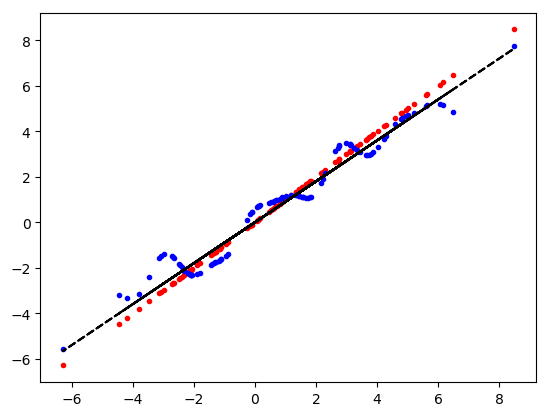

 1.142746742980443 	 1.0406888799405904 	 0.922554913202745


In [34]:
## Solve Both
include("src.jl")
vgauss = -ys./(sigma0^2 + sigma^2)
tw.fit_NW_ws(ones(n)*sigma, ys, sigma, t-> exp(-t^2/2))

vs_ls, col_vals_lp = tw.fit_cond_score_ls(ys, ws, k, k1, k12, .01, 0.001, TOL=1e-5)  
vs_qp, col_vals    = tw.fit_cond_score(     ys, ws, k, k1, k12, .01, 0.001, TOL=1e-5)
vgauss = -ys./(sigma0^2 + sigma^2)

plot(ys, ys + sigma^2 * vs_qp, ".r")
plot(ys, ys + sigma^2 * vs_ls, ".b")
plot(ys, ys + sigma^2 * vgauss, "--k")
#plot(ys, mu, ".k")

MSE_ls = mean((ys + sigma^2 * vs_ls - mu).^2)
MSE_qp = mean((ys + sigma^2 * vs_qp - mu).^2)
MSE_gauss = mean((ys + sigma^2 * vgauss - mu).^2)
println(" $MSE_ls \t $MSE_qp \t $MSE_gauss")

In [ ]:
include("src.jl")
lam_grid = 2.0.^(-5:1:3)
fit_ws(xs, ys, new_x) = tw.fit_NW_ws(xs, ys, new_x, t->exp(-t^2/2))
cv_vals = tw.tune_lam1(xs, ys, fit_ws, k, k1, k12, lam_grid, .001);

1.6942214152216574e-6


9.984067088194064e-8


Not solved to optimality, status: Suboptimal


2.69925524039796e-5


0.002769969426706035


Not solved to optimality, status: Suboptimal

0.0031089857817994462


Not solved to optimality, status: Suboptimal

4.529280693994097e-6


Not solved to optimality, status: Suboptimal


0.00034344008423882184
0.0003940446770909535


In [39]:
[lam_grid;
    cv_vals]



LoadError: [91mDimensionMismatch("tried to assign 9-element array to 9×2 destination")[39m